# Sales Data Analysis

###importing the necessary libraries

In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
##Removing any ipynb checkpoints that there may be:

In [13]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
###TASK 1: Merging the 12 data files as one csv file:

In [14]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir("./Sales_Data")]
all_months_data=pd.DataFrame()





for file in files:
    df=pd.read_csv("./Sales_Data/"+file) 
    all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [6]:
###Read in updated dataframe:


In [15]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
###Question 1: what was the best month for sales? How much was earned that month?


# Data-Cleanup


In [16]:
###DROP ROWS Of NAN:


In [17]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head(10)
##seeing the NAN Rows.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN
1774,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN
2027,NaN,NaN,NaN,NaN,NaN,NaN
2412,NaN,NaN,NaN,NaN,NaN,NaN
2532,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
all_data=all_data.dropna(how='all')
all_data.head()
###deleting the rows that have all the rows are NANS.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


###FIND 'Or' AND DELETE IT:

In [19]:
temp_df=all_data[all_data['Order Date'].str[0:2]== 'Or']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
###getting the rows that do not have 'Or' for the month
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

In [ ]:
#####converting columns to the correct types:

In [21]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])   #makeint int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])               #make float

####adding specific columns to our data set.

TASK 2: adding a specific month column to the data set to answer the question at hand.

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [23]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']==all_data['Month'].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02


In [24]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02
5,150507,Lightning Charging Cable,1,14.95,02/24/19 18:50,"387 12th St, Austin, TX 73301",02
6,150508,AA Batteries (4-pack),1,3.84,02/21/19 19:26,"622 Center St, San Francisco, CA 94016",02
7,150509,Apple Airpods Headphones,1,150.00,02/26/19 19:53,"921 6th St, Seattle, WA 98101",02
8,150510,USB-C Charging Cable,1,11.95,02/17/19 21:48,"451 2nd St, Los Angeles, CA 90001",02
9,150511,USB-C Charging Cable,1,11.95,02/22/19 07:36,"689 River St, San Francisco, CA 94016",02


In [25]:
####adding a sales column to answer the question at hand:

In [26]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68


In [27]:
results=all_data.groupby('Month').sum()

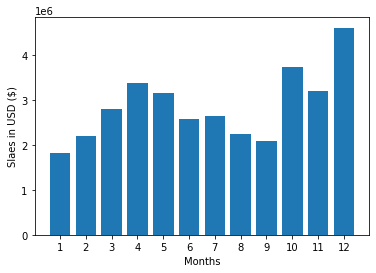

In [28]:
months=range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

In [29]:
###answering  the first question:
## December was the best month for sales with an revenue of approximately 4 million 6 hundread and 13 thousand dollars in
## sale, where as Janaury is the month with the least sales.
## Thinking about the result of our analysis, it does make sense, as December is the festive month, where people 
## normally give a lot of gifts to each other and hence the sales have gone high. One possible reason that the sales 
## are the lowest in january can be because it is the first month on the year , and people normally make resolutions
##where saving money is one popular resolution. Hence, the decreased sales. Even though we do not have  data about 
## the new-year resolution that people make at the moment, it is a good hypothesis for the business to conduct a
## survey and study. If true, then the Business can come up with special discounts and schemes only valid for the 
## month of January to convince people that buying the item in , they are actually saving money rather and the sales
## go up.


In [30]:
##Question 2: what city had the highest number of sales?

In [ ]:
##Task 4: add a city column, to answer the question at hand.

In [31]:
###using  the .apply() method to get the city from the location.

In [33]:
def get_city(address):
    return address.split(',')[1];
##realizing that there can be two cities with the same name in the US, we also grab the state, to ensure we dont 
## have data duplication.
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ( ' + get_state(x)+")")

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA)


In [36]:
results= all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,sales
City,,,
Atlanta ( GA),16602,2779908.20,2795498.58
Austin ( TX),11153,1809873.61,1819581.75
Boston ( MA),22528,3637409.77,3661642.01
Dallas ( TX),16730,2752627.82,2767975.40
Los Angeles ( CA),33289,5421435.23,5452570.80
New York City ( NY),27932,4635370.83,4664317.43
Portland ( ME),2750,447189.25,449758.27
Portland ( OR),11303,1860558.22,1870732.34
San Francisco ( CA),50239,8211461.74,8262203.91


In [ ]:
##plotting to make the results more visible.

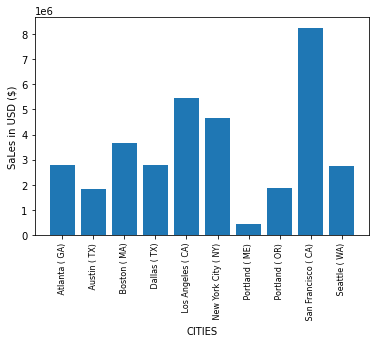

In [55]:
cities=[city for city,df in all_data.groupby('City')]## getting data in the same order

plt.bar(cities,results['sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('CITIES')
plt.show()

In [ ]:
### As we can clearly see from the graph the city with the most sales in San Framsico, with a sale of about 8.2 million
### dollars.  on the other hand portland is the city on the other hand of the scale, with the least sales.
## Thinking about why this maybe, San Franciso is home to the Silicon Valley, the Tech hub and it is well known
## that the tech industry needs a lot of electronic items and people working in tech do have a decent salary as well
## enough to buy electrnoic items of their wish. On the other hand Portland is the smallest city and therefore may be
## not doing so well in the market compared to all other big cities in the data set.


Question 3: what time shgould we display advetisements to maximize the likelihood of customers's buying product?

In [56]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA)


In [57]:
##i realize that to answer the third question at hand, what i reeally have to loook at is the order date, 
##and figure out a  way to aggregate the dates in a 24-hour period.

In [ ]:
## converting the order date to a date time object, using the data-time library of python.

In [58]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME)
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA)
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY)
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA)
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA)


In [60]:
##adding a hourand minute column to our data set to figure out the best time.


In [73]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data['Count']=1

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,Count
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME),1,35,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA),7,24,1
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY),9,46,1
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA),16,47,1
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA),20,32,1


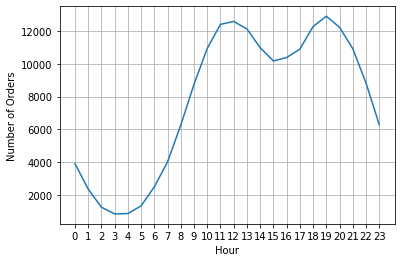

In [81]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()## to make it easier to read and understand.
plt.show()



In [ ]:
##My recommendation is to show the advertisement slightly between 11 and 12 am in the morning and at 7pm at night.
## Even though as a data analyst my job is not to make assumptions and let data tell the story, the interested 
## data analyst inside me cant help but wonder about the results that have come out from the analysis.
## The conclusion does make sense as and at 11 am it is early, People are doing chores and  7pm is noramlly the time
## people finish work and can buy things.

##Question 4: what prodcuts are most often sold together?

In [82]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,Count
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME),1,35,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA),7,24,1
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY),9,46,1
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA),16,47,1
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA),20,32,1


In [ ]:
## The best way to know which products are sold together, is to look at the order id. if they have the same 
##order id than that means they were ordered together.

In [83]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
##keep=false, just specifying that we want all the occurences of the duplicate(through false)
##and do not want to remove any.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,Count
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,1700.00,San Francisco ( CA),12,38,1
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,700.00,San Francisco ( CA),12,38,1
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,700.00,Seattle ( WA),23,38,1
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,14.95,Seattle ( WA),23,38,1
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",02,150.00,San Francisco ( CA),9,35,1
92,150590,AAA Batteries (4-pack),1,2.99,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",02,2.99,San Francisco ( CA),9,35,1
119,150617,Google Phone,1,600.00,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",02,600.00,New York City ( NY),0,2,1
120,150617,USB-C Charging Cable,1,11.95,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",02,11.95,New York City ( NY),0,2,1
154,150651,Google Phone,1,600.00,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",02,600.00,New York City ( NY),11,49,1
155,150651,USB-C Charging Cable,1,11.95,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",02,11.95,New York City ( NY),11,49,1


In [ ]:
## creating a new column, thats going to keep track of the bought together and have them on the same line.

In [85]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df.head()

/tmp/ipykernel_11532/748529760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,Count,Grouped
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,1700.00,San Francisco ( CA),12,38,1,"Macbook Pro Laptop,iPhone"
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,700.00,San Francisco ( CA),12,38,1,"Macbook Pro Laptop,iPhone"
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,700.00,Seattle ( WA),23,38,1,"iPhone,Lightning Charging Cable"
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,14.95,Seattle ( WA),23,38,1,"iPhone,Lightning Charging Cable"
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",02,150.00,San Francisco ( CA),9,35,1,"Apple Airpods Headphones,AAA Batteries (4-pack)"


In [105]:
## dropping out the duplicated occurences in the Grouped column.

In [87]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [ ]:
## count the pairs that are bought together.



In [94]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in  count.most_common(10):     ## getting the 10 most common pairs.
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### This data is very useful. The store should be smart and offer deals and even  discounts to the cheaper product among the two that are mostly bought togerther to lure in more people to ultimately buy both the products rather than just one.

###question 5: what product sold the most and why do you think it sold the most.

In [95]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,Count
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",02,700.00,Portland ( ME),1,35,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",02,3.84,San Francisco ( CA),7,24,1
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",02,389.99,New York City ( NY),9,46,1
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",02,14.95,Atlanta ( GA),16,47,1
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",02,7.68,Seattle ( WA),20,32,1


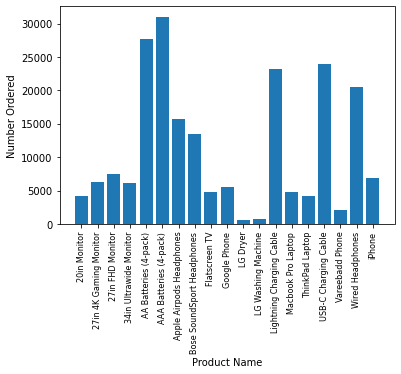

In [101]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.ylabel('Number Ordered')
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product Name')
plt.show()

#### The product that sold the most is the AAA Battery, followed by the AA Batteries. The hyposthesis for why this may be the case
#### is firstly beacuse  it is cheap while compared to the products that sell less such as the washing machine and the dryer, and 
#### secondly, from common sense that the batteries run out every once in a while and new once have to be purchases, which is 
#### the case with the other products, which easily lasts atleast a year once bought.

In [102]:
##proving our hypothesis, by adding a second axes:



/tmp/ipykernel_11532/2432378390.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/tmp/ipykernel_11532/2432378390.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


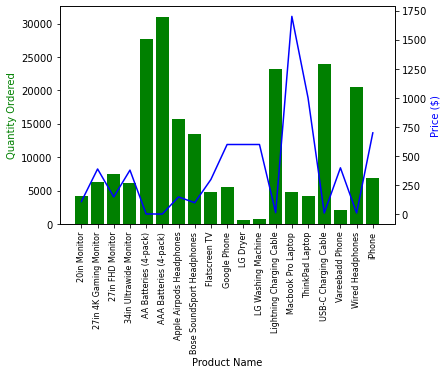

In [104]:
prices=all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

as we see, the higher the prices, the lowwer the sale for the product. But we do see  inconsistency in terms
of the macbookpro and think-pad laptop, which are pretty expensive but do sell a decent amount. the reason for this could b higher demand from students and the fact that these two are primarily the two laptops that offices use and provide to each new employee.
